### student code
## STEP1. Load MNIST data and split into train and test data

In [3]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print('... loading data')
with open('./data/mnist.pkl', 'rb') as f:
    train_set, valid_set, test_set = pickle.load(f, encoding='latin1')

... loading data


In [4]:
train_x, train_y = train_set
test_x, test_y = test_set

train_x = pd.DataFrame(train_x)
train_y = pd.DataFrame(train_y, columns=['label'])
test_x = pd.DataFrame(test_x)
test_y = pd.DataFrame(test_y, columns=['label'])

In [5]:
sub_train_x = train_x.iloc[:500, :]
sub_train_y = train_y.iloc[:500]
sub_test_x = test_x.iloc[:100, :]
sub_test_y = test_y.iloc[:100, :]

----
## STEP2 Classify MNIST data using __Decision Tree__🌲 sklearn library

In [ ]:
from sklearn.tree import DecisionTreeClassifier

decisionTree = DecisionTreeClassifier(random_state=0, criterion="entropy")
decisionTree.fit(train_x, train_y)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
print("=== > Test set score : {:.2f}".format(decisionTree.score(test_x, test_y)))

=== > Test set score : 0.88


---
## STEP3 Classify MNIST data using __Random Forest__🌲 sklearn library

In [8]:
from sklearn.ensemble import RandomForestClassifier

rforest = RandomForestClassifier(random_state=0)
rforest.fit(train_x, train_y)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=0)

In [9]:
print("Test set score : {:.2f}".format(rforest.score(test_x, test_y)))

Test set score : 0.97


-----
## STEP4 Visualization of result

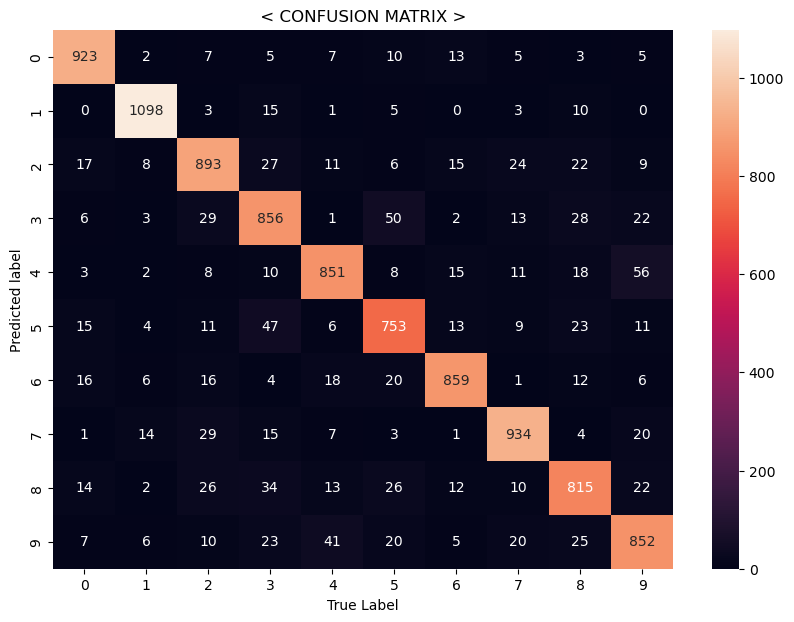

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

pred_y = decisionTree.predict(test_x)
cmdtree = confusion_matrix(test_y, pred_y)

plt.figure(figsize=(10,7))
sn.heatmap(cmdtree, annot=True, fmt='d')

plt.title(" < CONFUSION MATRIX > ")
plt.ylabel('Predicted label')
plt.xlabel('True Label')

plt.show()

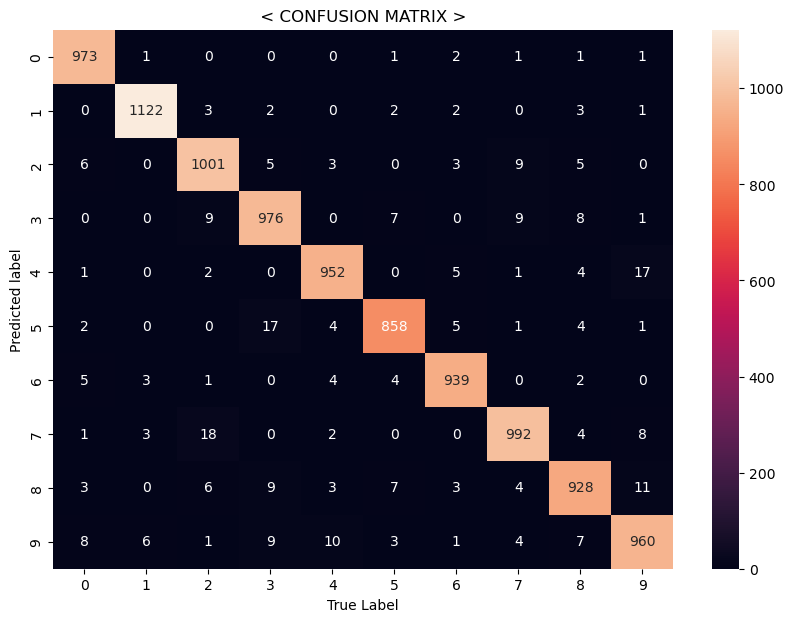

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

pred_y = rforest.predict(test_x)
rtree_cmd = confusion_matrix(test_y, pred_y)

plt.figure(figsize = (10, 7))
sn.heatmap(rtree_cmd, annot=True, fmt='d')

plt.title(" < CONFUSION MATRIX > ")
plt.ylabel('Predicted label')
plt.xlabel('True Label')

plt.show()

-----
## STEP5 Testing with Binary data

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import load_breast_cancer

In [13]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [14]:
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.DataFrame(data.target, columns=['label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Train data shape:", X_train.shape)
print("Test data shape:", X_test.shape)
print("Train label shape:", y_train.shape)
print("Test label shape:", y_test.shape)

Train data shape: (398, 30)
Test data shape: (171, 30)
Train label shape: (398, 1)
Test label shape: (171, 1)


In [15]:
bindtree = DecisionTreeClassifier(random_state=0)
bindtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [16]:
print("Test set score : {:.2f}".format(bindtree.score(X_test, y_test)))

Test set score : 0.91


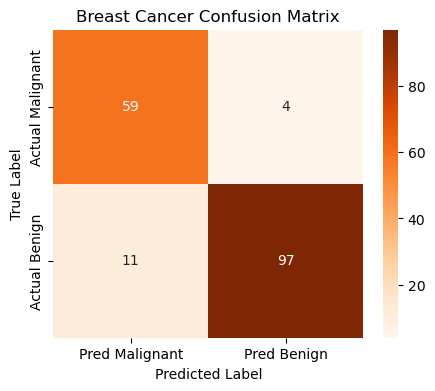

In [17]:
import seaborn as sn

y_pred = bindtree.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sn.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['Pred Malignant', 'Pred Benign'], yticklabels=['Actual Malignant', 'Actual Benign'])
plt.title("Breast Cancer Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [18]:
print(classification_report(y_test, y_pred, target_names=data.target_names))

              precision    recall  f1-score   support

   malignant       0.84      0.94      0.89        63
      benign       0.96      0.90      0.93       108

    accuracy                           0.91       171
   macro avg       0.90      0.92      0.91       171
weighted avg       0.92      0.91      0.91       171



In [19]:
print("""
Confusion Matrix Meaning:

               Predicted
             |  Mal |  Ben
        -------------------
Actual  Mal |  TP  |  FN  <-- Type II Error (False Negative)
Actual  Ben |  FP  |  TN  <-- Type I Error (False Positive)

- Type I Error: Model predicted Malignant, but it was actually Benign (False Positive)
- Type II Error: Model predicted Benign, but it was actually Malignant (False Negative)
""")


Confusion Matrix Meaning:

               Predicted
             |  Mal |  Ben
        -------------------
Actual  Mal |  TP  |  FN  <-- Type II Error (False Negative)
Actual  Ben |  FP  |  TN  <-- Type I Error (False Positive)

- Type I Error: Model predicted Malignant, but it was actually Benign (False Positive)
- Type II Error: Model predicted Benign, but it was actually Malignant (False Negative)



#LAST EXERCISE

X_train shape: (124, 3)
X_test shape: (54, 3)
Test set score : 0.96


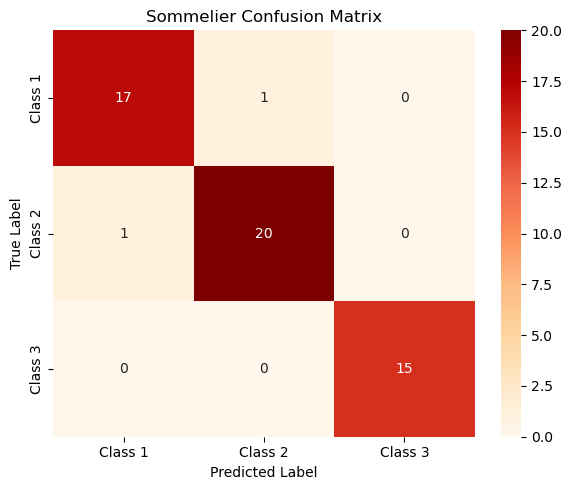

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target

selected_features = ['alcohol', 'color_intensity', 'flavanoids']
X = df[selected_features]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print("Test set score : {:.2f}".format(score))

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sn.heatmap(cm, annot=True, fmt='d', cmap='OrRd',
           xticklabels=['Class 1', 'Class 2', 'Class 3'],
           yticklabels=['Class 1', 'Class 2', 'Class 3'])

plt.title("Sommelier Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()
